# Checking Turbulent Kinetic Energy dissipation rate data

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path = '/scratch/local1/hzg_tmp/schout_7.nc'
df = Dataset(path, 'r')
df.variables['mixing_length']

<class 'netCDF4._netCDF4.Variable'>
float32 mixing_length(time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers)
    missing_value: 9.96921e+36
    mesh: SCHISM_hgrid
    data_horizontal_center: node
    data_vertical_center: full
    i23d: 2
    ivs: 1
unlimited dimensions: time
current shape = (24, 7500, 21)
filling on, default _FillValue of 9.969209968386869e+36 used

In [82]:
np.nanmean(df.variables['mixing_length'][:])

0.0026964394

## Looking at individual TKE diss 

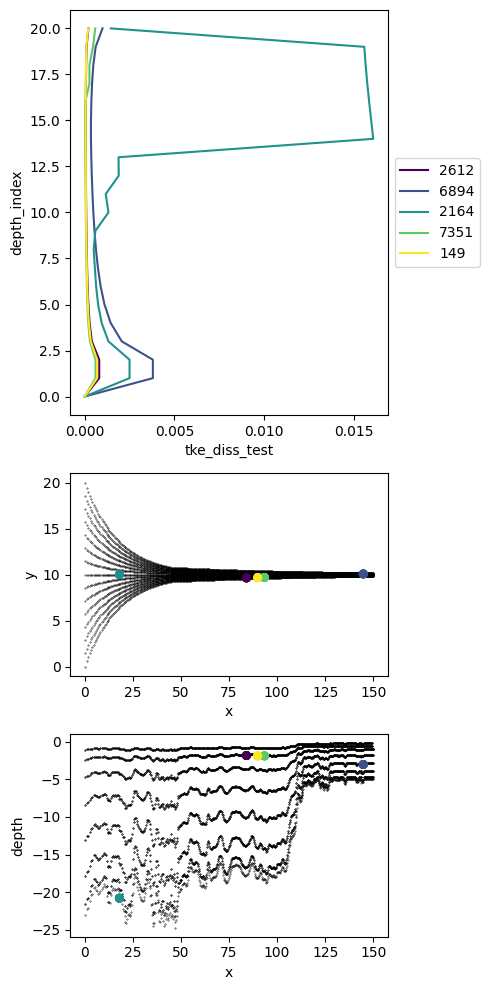

In [86]:
# vertical plot of tke_diss with depth index on y and values on x
depth_index = np.arange(21)
x = np.array(df.variables['SCHISM_hgrid_node_x'])*1e-3
y = np.array(df.variables['SCHISM_hgrid_node_y'])*1e-3
depth = np.array(df.variables['depth'])
tke_diss = df.variables['mixing_length']


# plot
fig, axs = plt.subplots(3, 1, figsize=(5, 10), gridspec_kw={'height_ratios': [2, 1, 1]})

n = 5
random_index = np.random.randint(0, 7500, n)

# 
colors = plt.cm.viridis(np.linspace(0, 1, n))

for jj,ii in enumerate(random_index):
    axs[0].plot(tke_diss[1, ii, :], depth_index, label=ii, color=colors[jj])
    axs[1].scatter(x[random_index], y[random_index], s=30, c=colors,zorder=10)
    axs[2].scatter(x[random_index], -depth[random_index], s=30, c=colors,zorder=10)

# Subplot 1: Plot of tke_diss_test vs depth_index
axs[0].set_xlabel('tke_diss_test')
axs[0].set_ylabel('depth_index')
# add legend right of plot
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Subplot 2: Scatter plot of x and y
axs[1].scatter(x, y, s=0.1, c='black')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Subplot 3: Scatter plot of x and depth
axs[2].scatter(x, -depth, s=0.1, c='black')
axs[2].set_xlabel('x')
axs[2].set_ylabel('depth')

plt.tight_layout()
plt.show()



## Looking at TKE diss distribution along depth

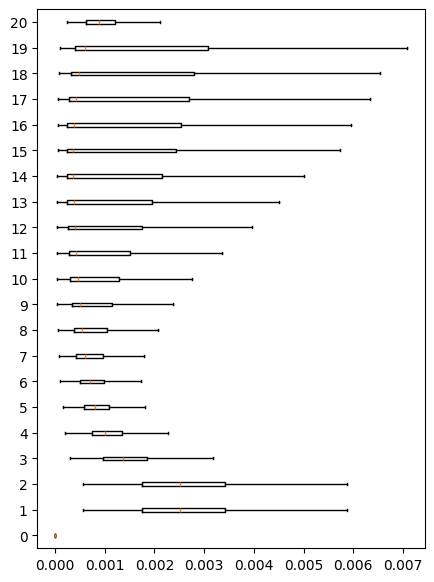

In [71]:
# # vertical plot of tke_diss with depth index on y and values on x
depth_index = np.arange(21)
x = np.array(df.variables['SCHISM_hgrid_node_x'])
y = np.array(df.variables['SCHISM_hgrid_node_y'])
depth = np.array(df.variables['depth'])
tke_diss = np.array(df.variables['mixing_length'])

daily_mean = np.mean(tke_diss, axis=0)

# make a boxplot for each depth layer based on the daily mean
plt.figure(figsize=(5, 7))
for ii in depth_index:
    plt.boxplot(daily_mean[:, ii], positions=[ii], vert=False, showfliers=False)

## Checking Elbe TKE diss

In [36]:
path = '/scratch/local1/hzg_tmp/schout_1.nc'
df = Dataset(path, 'r')
df.variables['TKE_dissipation_rate']

<class 'netCDF4._netCDF4.Variable'>
float32 TKE_dissipation_rate(time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers)
    missing_value: 9.96921e+36
    mesh: SCHISM_hgrid
    data_horizontal_center: node
    data_vertical_center: full
    i23d: 2
    ivs: 1
unlimited dimensions: time
current shape = (24, 41912, 21)
filling on, default _FillValue of 9.969209968386869e+36 used

In [37]:
np.nanmean(df.variables['TKE_dissipation_rate'][:])

0.0017379464

In [38]:
_ = [print(key) for key in df.variables.keys()]

time
SCHISM_hgrid
SCHISM_hgrid_face_nodes
SCHISM_hgrid_edge_nodes
SCHISM_hgrid_node_x
SCHISM_hgrid_node_y
node_bottom_index
SCHISM_hgrid_face_x
SCHISM_hgrid_face_y
ele_bottom_index
SCHISM_hgrid_edge_x
SCHISM_hgrid_edge_y
edge_bottom_index
depth
sigma
dry_value_flag
coordinate_system_flag
minimum_depth
sigma_h_c
sigma_theta_b
sigma_theta_f
sigma_maxdepth
Cs
wetdry_elem
zcor
elev
solar_radiation
total_heat_flux
bottom_stress
wind_speed
dahv
vertical_velocity
temp
salt
diffusivity
TKE
TKE_dissipation_rate
hvel
SED_depth_change
SED_D50
SED_bed_stress
SED_bed_roughness
SED_TSC
bed_thickness
bed_age
SED_poro
SED_depflx
SED_qbdl_acc
SED_bdld_1
ECO_no3
ECO_nh4
ECO_pho
ECO_sil
ECO_oxy
ECO_fla
ECO_dia
ECO_bg
ECO_bgchl
ECO_diachl
ECO_flachl
ECO_microzoo
ECO_mesozoo
ECO_det
ECO_opa
ECO_pip
ECO_dom
ECO_sed1
ECO_sed2
ECO_sed3


In [39]:
x = np.array(df.variables['SCHISM_hgrid_node_x'])
y = np.array(df.variables['SCHISM_hgrid_node_y'])
tri = df.variables['SCHISM_hgrid_face_nodes'][:,:3] - 1
tke_diss = df.variables['TKE_dissipation_rate']

In [45]:
tke_diss_avg = np.average(tke_diss[:], axis=(0,2))

15

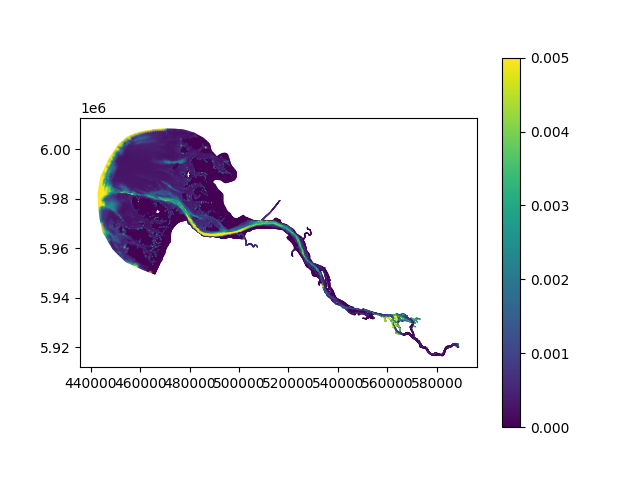

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [55]:
%matplotlib widget

fig,ax = plt.subplots()
# plt.triplot(x, y, tri)
ax.tripcolor(x, y, tri, tke_diss_avg, shading='gouraud',vmin=0, vmax=0.005)
# colorbar for ax
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')

#aspect ratio
ax.set_aspect('equal', 'box')

# print tke_diss_avg at courser location when clicked
# def onclick(event):
#     print(tke_diss_avg[int(event.ydata), int(event.xdata)])

# fig.canvas.mpl_connect('button_press_event', onclick)


In [22]:
# distance between nodes in tri
dist = np.linalg.norm(np.array([x[tri[:, 0]], y[tri[:, 0]]]) - np.array([x[tri[:, 1]], y[tri[:, 1]]]), axis=0)

In [33]:
path = '/scratch/local1/hzg3/schout_1.nc'
df = Dataset(path, 'r')

x = np.array(df.variables['SCHISM_hgrid_node_x'])
y = np.array(df.variables['SCHISM_hgrid_node_y'])
tri = df.variables['SCHISM_hgrid_face_nodes'][:,:3] - 1

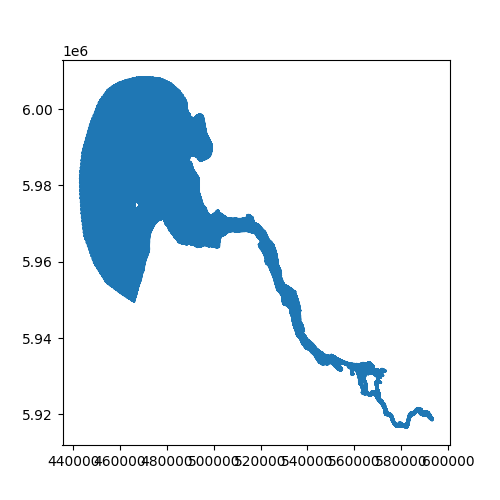

In [34]:
%matplotlib widget

# plot mesh
plt.figure(figsize=(5, 5))
plt.triplot(x, y, tri)